In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv("news.csv")
file.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
file.shape

(6335, 4)


# DATA VISUALIZATION

In [3]:
counts = file['label'].value_counts()

<AxesSubplot:>

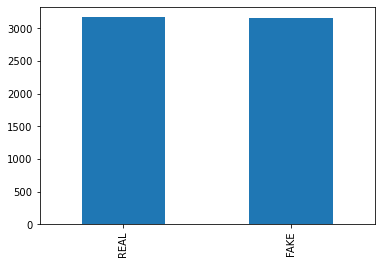

In [4]:
counts.plot(kind = 'bar')

The plot above shows a balanced target class.

# MODEL BUILDING

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

In [6]:
X = file["text"]
Y = file["label"]

In [7]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [9]:
tfidf = TfidfVectorizer(stop_words = "english", max_df = 0.7)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [10]:
pac = PassiveAggressiveClassifier(max_iter = 50)

In [11]:
pac.fit(x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
y_pred = pac.predict(x_test)

In [13]:
confusion_matrix(y_pred,y_test)

array([[868,  63],
       [ 65, 905]], dtype=int64)

In [14]:
print("Accuracy score: {}% ".format(round(accuracy_score(y_pred,y_test)*100,2)))
print("F1 score: ", round(f1_score(y_pred,y_test),2))

Accuracy score: 93.27% 
F1 score:  0.93
